In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("words_glasgow.csv", skipinitialspace=True)
df.head()

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
0,abattoir,8,4.200,2.864,4.333,5.455,4.391,2.382,6.760,4.652,5.391,0,160074.0
1,abbey,5,3.125,5.781,4.667,5.906,5.344,3.324,5.177,5.121,3.303,0,4224864.0
2,abbreviate,10,3.273,5.250,5.235,3.286,3.177,5.121,5.543,2.667,3.971,0,140105.0
3,abdicate,8,4.194,3.767,4.419,3.367,2.516,3.971,6.233,4.679,5.167,0,124123.0
4,abdication,10,3.846,3.880,4.800,3.292,2.571,3.097,6.407,5.083,4.571,0,128143.0


In [3]:
###### Lecture Pipeline ######
# you can/have to modify the order for your project,
# e.g. hyperparameter tuning before evaluating a decision tree

# Hold-out
from sklearn.model_selection import train_test_split

# Decision Tree
from sklearn.tree import DecisionTreeClassifier #!!!
# Optional: KNN
from sklearn.neighbors import KNeighborsClassifier #!!!

##### Decision Tree Visualization ###
from sklearn import tree # export_graphviz() method
import pydotplus # viz stuff
from IPython.display import Image # viz stuff
####################################

######## Evaluation #######
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
# Optional: baseline comparison
from sklearn.dummy import DummyClassifier
###########################

# hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# cross-validation
from sklearn.model_selection import cross_val_score

from sklearn.naive_bayes import GaussianNB

In [4]:
df['emotion']= (df['valence']+ df['dominance']) / 2
df['visual'] = (df['concreteness']+ df['imageability']) / 2

In [5]:
df.head()

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq,emotion,visual
0,abattoir,8,4.200,2.864,4.333,5.455,4.391,2.382,6.760,4.652,5.391,0,160074.0,3.5985,4.9230
1,abbey,5,3.125,5.781,4.667,5.906,5.344,3.324,5.177,5.121,3.303,0,4224864.0,5.2240,5.6250
2,abbreviate,10,3.273,5.250,5.235,3.286,3.177,5.121,5.543,2.667,3.971,0,140105.0,5.2425,3.2315
3,abdicate,8,4.194,3.767,4.419,3.367,2.516,3.971,6.233,4.679,5.167,0,124123.0,4.0930,2.9415
4,abdication,10,3.846,3.880,4.800,3.292,2.571,3.097,6.407,5.083,4.571,0,128143.0,4.3400,2.9315


In [6]:
df2 = df.drop(["word","web_corpus_freq","emotion","visual"], axis=1)

df2.head()

,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy
0,8,4.200,2.864,4.333,5.455,4.391,2.382,6.760,4.652,5.391,0
1,5,3.125,5.781,4.667,5.906,5.344,3.324,5.177,5.121,3.303,0
2,10,3.273,5.250,5.235,3.286,3.177,5.121,5.543,2.667,3.971,0
3,8,4.194,3.767,4.419,3.367,2.516,3.971,6.233,4.679,5.167,0
4,10,3.846,3.880,4.800,3.292,2.571,3.097,6.407,5.083,4.571,0


In [7]:
df3 = df2

df3.loc[df['gender'] < 3.5, 'genderr'] = 0
df3.loc[df['gender'] >= 3.5, 'genderr'] = 1

df3 = df3.drop(["polysemy","gender"], axis=1)
df3.rename(columns={'genderr': 'gender'}, inplace = True)
df3["gender"].value_counts()

df3.head()

,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender
0,8,4.200,2.864,4.333,5.455,4.391,2.382,6.760,4.652,1.0
1,5,3.125,5.781,4.667,5.906,5.344,3.324,5.177,5.121,0.0
2,10,3.273,5.250,5.235,3.286,3.177,5.121,5.543,2.667,1.0
3,8,4.194,3.767,4.419,3.367,2.516,3.971,6.233,4.679,1.0
4,10,3.846,3.880,4.800,3.292,2.571,3.097,6.407,5.083,1.0


In [8]:
df.head()

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq,emotion,visual
0,abattoir,8,4.200,2.864,4.333,5.455,4.391,2.382,6.760,4.652,5.391,0,160074.0,3.5985,4.9230
1,abbey,5,3.125,5.781,4.667,5.906,5.344,3.324,5.177,5.121,3.303,0,4224864.0,5.2240,5.6250
2,abbreviate,10,3.273,5.250,5.235,3.286,3.177,5.121,5.543,2.667,3.971,0,140105.0,5.2425,3.2315
3,abdicate,8,4.194,3.767,4.419,3.367,2.516,3.971,6.233,4.679,5.167,0,124123.0,4.0930,2.9415
4,abdication,10,3.846,3.880,4.800,3.292,2.571,3.097,6.407,5.083,4.571,0,128143.0,4.3400,2.9315


In [9]:
# TRAIN_SET & TEST_SET

# test_size = 0.7 TrainSet, 0.3 TestSet
# stratify = ?
# random_state = split specifico, utile x comparazioni

attributes = [col for col in df3.columns if col != 'gender']
X = df3[attributes].values
y = df3['gender']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

In [10]:
print(f"Elementi in df3: \t\t{len(df3)}")
print(f"Elementi in Train_set: \t{X_train.shape[0]}")
print(f"Elementi in Test_set: \t{X_test.shape[0]}")

Elementi in df3: 		4682
Elementi in Train_set: 	3277
Elementi in Test_set: 	1405


In [11]:
# Righe X Colonne
df3.shape, X_train.shape, X_test.shape

((4682, 10), (3277, 9), (1405, 9))

In [12]:
# criterion --> criterion for impurity.
# max_depth=None --> ?
# min_samples_split --> min # values in the node to split it, (10) in this case.
# min_samples_leaf --> min # of samples required to be in both left and right child if we want to split the parent

clf = DecisionTreeClassifier(criterion='gini',
                             max_depth=None ,
                             min_samples_split=10,
                             min_samples_leaf=5,
                             )

clf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=5, min_samples_split=10)

In [13]:
clf.feature_importances_

array([0.01741507, 0.07462704, 0.35299345, 0.13921978, 0.07425715,
       0.07061987, 0.07883706, 0.07787333, 0.11415725])

In [14]:
imp_dict = {attr: clf.feature_importances_[i] for i, attr in enumerate(attributes)}
imp_dict

{'length': 0.01741507389617729,
 'arousal': 0.07462703601567894,
 'valence': 0.35299344555968604,
 'dominance': 0.13921978383771388,
 'concreteness': 0.07425714807131062,
 'imageability': 0.07061986591521036,
 'familiarity': 0.07883706309738965,
 'aoa': 0.07787333371719798,
 'semsize': 0.11415724988963531}

In [15]:
{k: v for k, v in sorted(imp_dict.items(), key=lambda item: item[1], reverse=True)}

{'valence': 0.35299344555968604,
 'dominance': 0.13921978383771388,
 'semsize': 0.11415724988963531,
 'familiarity': 0.07883706309738965,
 'aoa': 0.07787333371719798,
 'arousal': 0.07462703601567894,
 'concreteness': 0.07425714807131062,
 'imageability': 0.07061986591521036,
 'length': 0.01741507389617729}

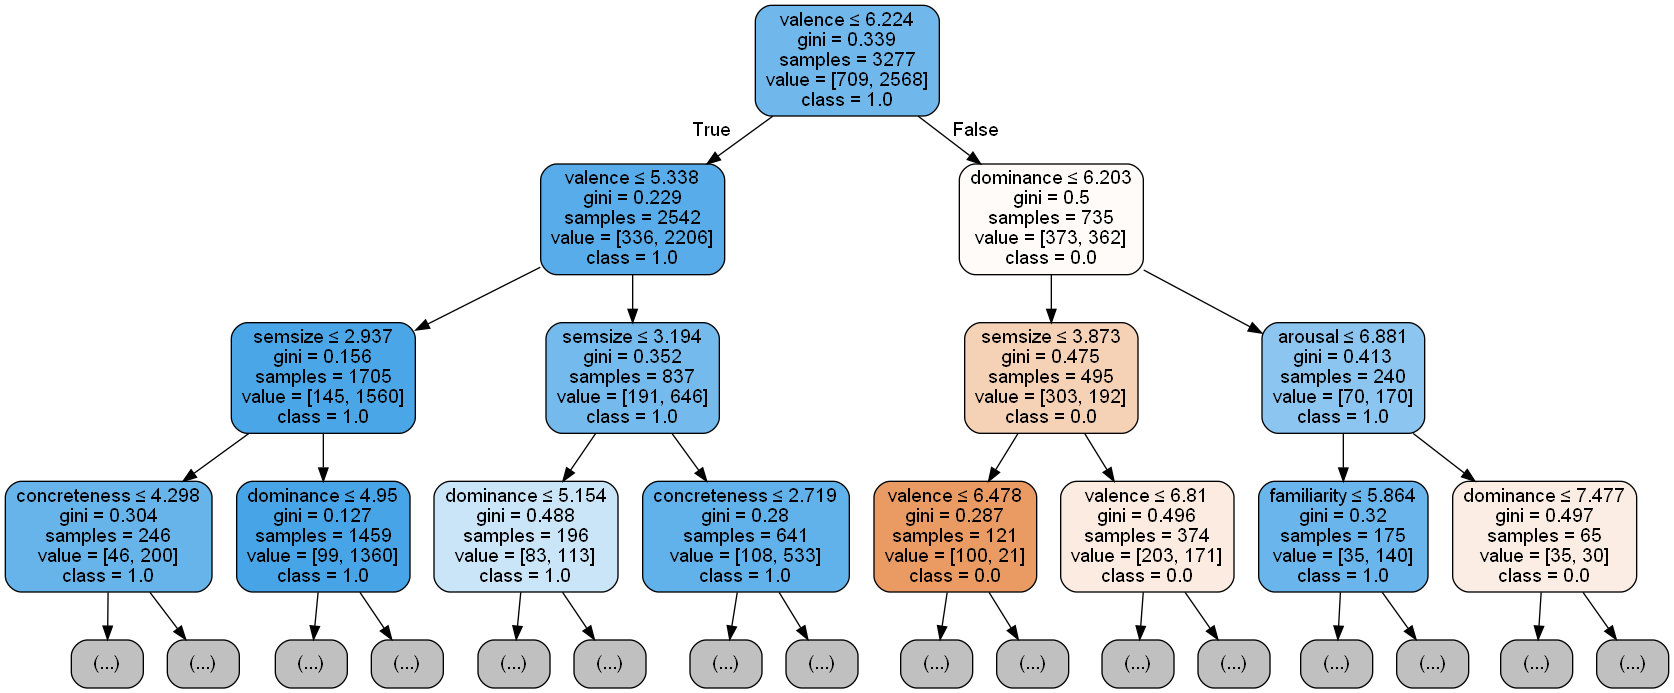

In [17]:
# features_name = nomi delle variabili
# max_depth = livelli visualizzati

dot_data = tree.export_graphviz (clf, out_file=None,
                                 feature_names=attributes,
                                 class_names=[str(v) for v in clf.classes_],
                                 filled=True, rounded=True,
                                 special_characters=True,
                                 max_depth=3)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [17]:
y_pred = clf.predict(X_test)

In [18]:
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('F1: \t ', f1_score(y_test, y_pred, average=None))

Accuracy:  0.7615658362989324
F1: 	  [0.464      0.84668192]


In [29]:
print( classification_report(y_test, y_pred) )

              precision    recall  f1-score   support

         0.0       0.45      0.48      0.46       304
         1.0       0.85      0.84      0.85      1101

    accuracy                           0.76      1405
   macro avg       0.65      0.66      0.66      1405
weighted avg       0.77      0.76      0.76      1405



In [30]:
# CONFUSION MATRIX

cf_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])

# TP, FN, FP, TN
lista_positivi_e_negativi = cf_matrix[0][0], cf_matrix[0][1], cf_matrix[1][0], cf_matrix[1][1]

cf_matrix

array([[925, 176],
       [159, 145]], dtype=int64)

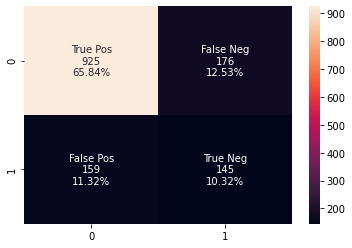

In [31]:
#CF MATRIX VISUALIZATION

import seaborn as sns

group_names = ["True Pos","False Neg","False Pos","True Neg"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix, annot=labels, fmt="")

In [22]:
y_pred = clf.predict( X_test )
y_pred[:5]

array([1., 1., 1., 0., 1.])

In [23]:
# prediction of a record to belong to the positive class

y_score = clf.predict_proba(X_test)
y_score[:6]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [24]:
fpr, tpr, th = roc_curve(y_test, y_score[:,1])

roc_auc = auc(fpr, tpr)
print(roc_auc)

0.7074609206941058


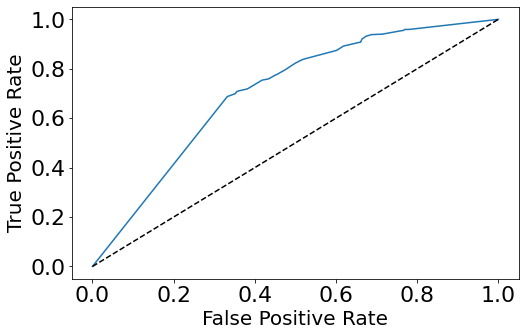

In [25]:
plt.figure(figsize=(8,5))

plt.plot(fpr, tpr)

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)

plt.tick_params(axis='both', which='major', labelsize=22)

In [26]:
param_list = {'max_depth': [None] + [2, 3, 4],
              'min_samples_split': [2, 5, 10, 20],
              'min_samples_leaf': [1, 5, 10, 20]
              }
# scoring = su che tipo di valore

grid_search = GridSearchCV(clf, param_grid=param_list, scoring='f1')
grid_search.fit(X, y)

res = grid_search.cv_results_

In [310]:
res

{'mean_fit_time': array([0.04519014, 0.04340782, 0.03164635, 0.03710918, 0.03423319,
        0.03524485, 0.04171605, 0.05001049, 0.0437396 , 0.03440366,
        0.02499523, 0.03896399, 0.03264794, 0.02557693, 0.03516583,
        0.02481871, 0.0031239 , 0.00937257, 0.00624862, 0.00937319,
        0.00937171, 0.01017308, 0.00959086, 0.00865192, 0.00799623,
        0.0066905 , 0.00586157, 0.00963664, 0.00780544, 0.00799971,
        0.00798268, 0.00799422, 0.00878816, 0.01445785, 0.01118903,
        0.01439056, 0.01118312, 0.00802693, 0.00624795, 0.00624957,
        0.00625443, 0.01249704, 0.00937271, 0.00703206, 0.00642686,
        0.00937262, 0.00937281, 0.01399388, 0.01920009, 0.01741695,
        0.01917996, 0.02138257, 0.0192574 , 0.01759014, 0.01759491,
        0.01919527, 0.02079439, 0.01917505, 0.020785  , 0.02084289,
        0.01870036, 0.0176723 , 0.02240043, 0.01603136]),
 'std_fit_time': array([1.00210605e-02, 6.65497581e-03, 5.24793687e-03, 9.29283535e-03,
        5.84804439e-0

In [27]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=4, min_samples_leaf=20)

In [28]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                results['mean_test_score'][candidate],
                results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [281]:
report(res,n_top=10)

Model with rank: 1
Mean validation score: 0.893 (std: 0.006)
Parameters: {'max_depth': 4, 'min_samples_leaf': 20, 'min_samples_split': 2}

Model with rank: 1
Mean validation score: 0.893 (std: 0.006)
Parameters: {'max_depth': 4, 'min_samples_leaf': 20, 'min_samples_split': 5}

Model with rank: 1
Mean validation score: 0.893 (std: 0.006)
Parameters: {'max_depth': 4, 'min_samples_leaf': 20, 'min_samples_split': 10}

Model with rank: 1
Mean validation score: 0.893 (std: 0.006)
Parameters: {'max_depth': 4, 'min_samples_leaf': 20, 'min_samples_split': 20}

Model with rank: 5
Mean validation score: 0.892 (std: 0.006)
Parameters: {'max_depth': 4, 'min_samples_leaf': 10, 'min_samples_split': 20}

Model with rank: 6
Mean validation score: 0.892 (std: 0.006)
Parameters: {'max_depth': 4, 'min_samples_leaf': 10, 'min_samples_split': 2}

Model with rank: 6
Mean validation score: 0.892 (std: 0.006)
Parameters: {'max_depth': 4, 'min_samples_leaf': 10, 'min_samples_split': 5}

Model with rank: 6
Mean 

In [34]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

clf2 = KNeighborsClassifier(n_neighbors=5) # KNN
clf2.fit(X_train,y_train)
y_pred2 =clf2.predict(X_test)

clf3=RandomForestClassifier(n_estimators=30,  # The number of trees in the forest
                             min_samples_split=10,
                             min_samples_leaf=5) # Random Forest
clf3.fit(X_train,y_train)
y_pred3=clf3.predict(X_test)

clf4 = GaussianNB() # Gaussian Naive Bayes
clf4.fit(X_train,y_train)
y_pred4=clf4.predict(X_test)

clf5 = SVC(kernel='rbf', C=0.5, gamma='scale', probability=True, decision_function_shape='ovo') # SVM rbf
clf5.fit(X_train,y_train)
y_pred5=clf5.predict(X_test)

clf6 = SVC(kernel='sigmoid', C=0.5, gamma='scale', probability=True, decision_function_shape='ovo') # SVM sigmoid
clf6.fit(X_train,y_train)
y_pred6=clf6.predict(X_test)

scores = cross_val_score(clf, X, y, cv=10, scoring='f1')
scores2 = cross_val_score(clf2, X, y, cv=10, scoring='f1')
scores3 = cross_val_score(clf3, X, y, cv=10, scoring='f1')
scores4 = cross_val_score(clf4, X, y, cv=10, scoring='f1')
scores5 = cross_val_score(clf5, X, y, cv=10, scoring='f1')
scores6 = cross_val_score(clf6, X, y, cv=10, scoring='f1')

In [35]:
print("- VALORI DT - \n")

print("Accuracy DT:   \t\t", round(metrics.accuracy_score(y_test, y_pred),3))
print('F1- Score DT:\t\t', round(metrics.f1_score(y_test, y_pred),3))
print("Cross Validation DT:\t", round(scores.mean(),3),"\n")

print("- VALORI KNN - \n")

print("Accuracy:   \t\t", round(metrics.accuracy_score(y_test, y_pred2),3))
print('F1- Score:\t\t', round(metrics.f1_score(y_test, y_pred2),3))
print("Cross Validation:\t", round(scores2.mean(),3),"\n")

print("- VALORI RF - \n")

print("Accuracy:   \t\t", round(metrics.accuracy_score(y_test, y_pred3),3))
print('F1- Score:\t\t', round(metrics.f1_score(y_test, y_pred3),3))
print("Cross Validation:\t", round(scores3.mean(),3),"\n")

print("- VALORI Gaussian Naive Bayes - \n")

print("Accuracy:   \t\t", round(metrics.accuracy_score(y_test, y_pred4),3))
print('F1- Score:\t\t', round(metrics.f1_score(y_test, y_pred4),3))
print("Cross Validation:\t", round(scores4.mean(),3),"\n")

print("- VALORI Support Vector Machine RBF - \n")

print("Accuracy:   \t\t", round(metrics.accuracy_score(y_test, y_pred5),3))
print('F1- Score:\t\t', round(metrics.f1_score(y_test, y_pred5),3))
print("Cross Validation:\t", round(scores5.mean(),3),"\n")

print("- VALORI Support Vector Machine SIGMOID - \n")

print("Accuracy:   \t\t", round(metrics.accuracy_score(y_test, y_pred6),3))
print('F1- Score:\t\t', round(metrics.f1_score(y_test, y_pred6),3))
print("Cross Validation:\t", round(scores6.mean(),3),"\n")

- VALORI DT - 

Accuracy DT:   		 0.762
F1- Score DT:		 0.847
Cross Validation DT:	 0.853 

- VALORI KNN - 

Accuracy:   		 0.802
F1- Score:		 0.881
Cross Validation:	 0.884 

- VALORI RF - 

Accuracy:   		 0.83
F1- Score:		 0.898
Cross Validation:	 0.899 

- VALORI Gaussian Naive Bayes - 

Accuracy:   		 0.781
F1- Score:		 0.862
Cross Validation:	 0.864 

- VALORI Support Vector Machine RBF - 

Accuracy:   		 0.83
F1- Score:		 0.9
Cross Validation:	 0.899 

- VALORI Support Vector Machine SIGMOID - 

Accuracy:   		 0.784
F1- Score:		 0.879
Cross Validation:	 0.879 



In [36]:
train_pred_dt = clf.predict(X_train) # DT
test_pred_dt = clf.predict(X_test)

train_pred_knn = clf2.predict(X_train) # KNN
test_pred_knn = clf2.predict(X_test)

train_pred_rf = clf3.predict(X_train) # RF
test_pred_rf = clf3.predict(X_test)

train_pred_gnb = clf4.predict(X_train) #GNB
test_pred_gnb = clf4.predict(X_test)

In [37]:
# CLASSIFICATION REPORT DECISION TREE

print("CLASSIFICATION REPORT DECISION TREE - TRAIN\n")
print(classification_report(y_train, train_pred_dt))
print()
print("CLASSIFICATION REPORT DECISION TREE - TEST\n")
print(classification_report(y_test, test_pred_dt))

CLASSIFICATION REPORT DECISION TREE - TRAIN

              precision    recall  f1-score   support

         0.0       0.78      0.82      0.80       709
         1.0       0.95      0.93      0.94      2568

    accuracy                           0.91      3277
   macro avg       0.86      0.88      0.87      3277
weighted avg       0.91      0.91      0.91      3277


CLASSIFICATION REPORT DECISION TREE - TEST

              precision    recall  f1-score   support

         0.0       0.45      0.48      0.46       304
         1.0       0.85      0.84      0.85      1101

    accuracy                           0.76      1405
   macro avg       0.65      0.66      0.66      1405
weighted avg       0.77      0.76      0.76      1405



In [38]:
# CLASSIFICATION REPORT KNN

print("CLASSIFICATION REPORT KNN - TRAIN\n")
print(classification_report(y_train, train_pred_knn))
print()
print("CLASSIFICATION REPORT KNN - TEST\n")
print(classification_report(y_test, test_pred_knn))

CLASSIFICATION REPORT KNN - TRAIN

              precision    recall  f1-score   support

         0.0       0.78      0.47      0.59       709
         1.0       0.87      0.96      0.91      2568

    accuracy                           0.86      3277
   macro avg       0.83      0.72      0.75      3277
weighted avg       0.85      0.86      0.84      3277


CLASSIFICATION REPORT KNN - TEST

              precision    recall  f1-score   support

         0.0       0.57      0.33      0.42       304
         1.0       0.83      0.93      0.88      1101

    accuracy                           0.80      1405
   macro avg       0.70      0.63      0.65      1405
weighted avg       0.78      0.80      0.78      1405



In [39]:
# CLASSIFICATION REPORT RANDOM FOREST

print("CLASSIFICATION REPORT RF - TRAIN\n")
print(classification_report(y_train, train_pred_rf))
print()
print("CLASSIFICATION REPORT RF - TEST\n")
print(classification_report(y_test, test_pred_rf))

CLASSIFICATION REPORT RF - TRAIN

              precision    recall  f1-score   support

         0.0       0.93      0.64      0.76       709
         1.0       0.91      0.99      0.95      2568

    accuracy                           0.91      3277
   macro avg       0.92      0.81      0.85      3277
weighted avg       0.91      0.91      0.90      3277


CLASSIFICATION REPORT RF - TEST

              precision    recall  f1-score   support

         0.0       0.70      0.38      0.49       304
         1.0       0.85      0.95      0.90      1101

    accuracy                           0.83      1405
   macro avg       0.77      0.67      0.69      1405
weighted avg       0.81      0.83      0.81      1405



In [40]:
# CLASSIFICATION REPORT GAUSSIAN NAIVE BAYES

print("CLASSIFICATION REPORT NAIVE BAYES - TRAIN\n")
print(classification_report(y_train, train_pred_gnb))
print()
print("CLASSIFICATION REPORT NAIVE BAYES - TEST\n")
print(classification_report(y_test, test_pred_gnb))

CLASSIFICATION REPORT NAIVE BAYES - TRAIN

              precision    recall  f1-score   support

         0.0       0.49      0.43      0.46       709
         1.0       0.85      0.88      0.86      2568

    accuracy                           0.78      3277
   macro avg       0.67      0.65      0.66      3277
weighted avg       0.77      0.78      0.77      3277


CLASSIFICATION REPORT NAIVE BAYES - TEST

              precision    recall  f1-score   support

         0.0       0.49      0.44      0.47       304
         1.0       0.85      0.87      0.86      1101

    accuracy                           0.78      1405
   macro avg       0.67      0.66      0.66      1405
weighted avg       0.77      0.78      0.78      1405



In [41]:
param_list = {'max_depth': [1, 2, 3, 4],
              'min_samples_split': [2, 5, 10, 20],
              'min_samples_leaf': [1, 5, 10, 20],
             }



grid_search = GridSearchCV(clf, param_grid=param_list, scoring='recall')
grid_search.fit(X_train, y_train)

res = grid_search.cv_results_

In [42]:
import csv

vals = grid_search.cv_results_['mean_test_score']
to_csv = grid_search.cv_results_['params']

with open('sample.csv', 'w') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames = ['recall','criterion','max_depth', 'min_samples_leaf', 'min_samples_split'])
    writer.writeheader()
    writer.writerows(to_csv)
    
df_to_csv = pd.DataFrame()
df_to_csv['recall'] = vals
df_to_csv['criterion'] = ['gini' for i in range(len(df_to_csv))]

In [43]:
param_d = {'max_depth': [], 'min_samples_leaf': [], 'min_samples_split': []}

for el in to_csv:
    for k, v in el.items():
        if v == None:
            param_d[k].append(0)
        else:
            param_d[k].append(v)
        
df_to_csv['max_depth'] = param_d['max_depth']
df_to_csv['min_samples_leaf'] = param_d['min_samples_leaf']
df_to_csv['min_samples_split'] = param_d['min_samples_split']

In [44]:
df_to_csv.to_csv('sample.csv', index=False)

NameError: name 'x_ticks' is not defined

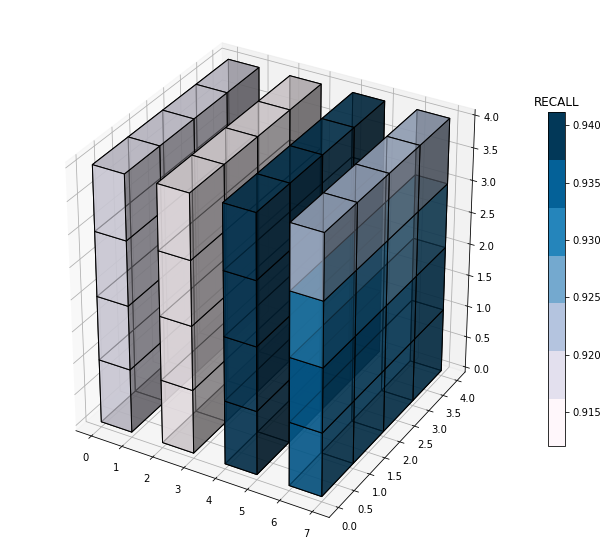

In [45]:
from heatmap3Dlib import plot3D as p3D

ax, fig, cbr = p3D.heatmap_3d(path= "sample.csv", metric="recall", optimal = [1, 1, 1], # TODO: optimal
                              crt = ("criterion",'gini'),
                              param1 = "max_depth",
                              param2 = "min_samples_split",
                              param3 = "min_samples_leaf",
                              modul=1
                             )

ax.set_xticklabels(x_ticks, fontsize=12)
ax.set_yticklabels(y_ticks, fontsize=12)
ax.set_zticklabels(z_ticks, fontsize=12)
ax.set_xlabel("max_depth", fontsize=15, labelpad=10)
ax.set_ylabel("min_samples_split", fontsize=15, labelpad=10)
ax.set_zlabel("min_samples_leaf", fontsize=15, labelpad=10)
ax.set_title("Criterion - GINI", fontsize=15, loc='center', pad=15)
ax.view_init(30,300)
fig.savefig("DT_all.png", format="png")

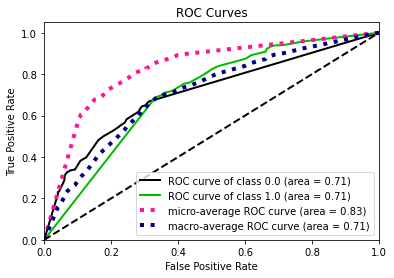

In [46]:
import scikitplot as skplt
skplt.metrics.plot_roc(y_test, y_score)

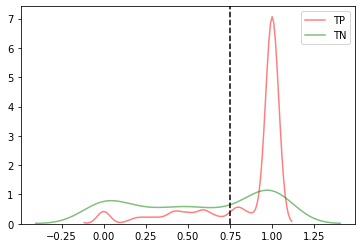

In [47]:
# KDEPLOTS just for understanding how a threshold work:
# green line to the right of the threshold are FPs
# red line to the left of the threshold are FNs

sns.kdeplot(y_score[:,1][y_test == 1], alpha=0.5, color='red', label='TP')
sns.kdeplot(y_score[:,1][y_test == 0], alpha=0.5, color='green', label='TN')

# example
threshold = 0.75
plt.axvline(threshold, c='black', ls='dashed')

plt.legend()

In [48]:
y_score2 = clf2.predict_proba(X_test)
y_score3 = clf3.predict_proba(X_test)
y_score4 = clf4.predict_proba(X_test)
y_score5 = clf5.predict_proba(X_test)
y_score6 = clf6.predict_proba(X_test)

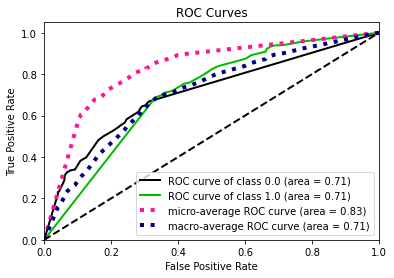

In [49]:
skplt.metrics.plot_roc(y_test, y_score)

In [50]:
y_score3 = clf3.predict_proba(X_test)

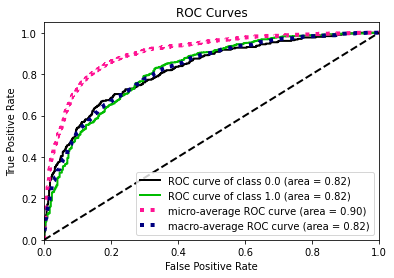

In [51]:
skplt.metrics.plot_roc(y_test, y_score3)

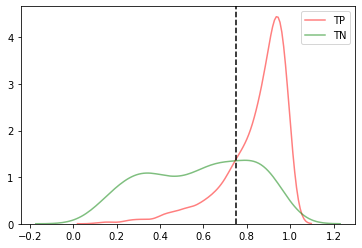

In [52]:
sns.kdeplot(y_score3[:,1][y_test == 1], alpha=0.5, color='red', label='TP')
sns.kdeplot(y_score3[:,1][y_test == 0], alpha=0.5, color='green', label='TN')

# example
threshold = 0.75
plt.axvline(threshold, c='black', ls='dashed')

plt.legend()

In [53]:
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve

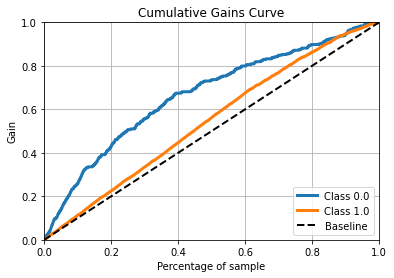

In [54]:
plot_cumulative_gain(y_test, y_score)
plt.show()

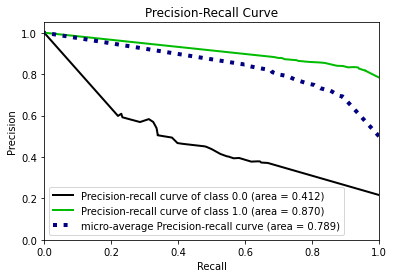

In [55]:
plot_precision_recall(y_test, y_score)
plt.show()

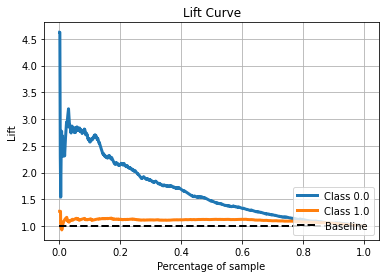

In [56]:
plot_lift_curve(y_test, y_score)
plt.show()

In [57]:
df.head()

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq,emotion,visual
0,abattoir,8,4.200,2.864,4.333,5.455,4.391,2.382,6.760,4.652,5.391,0,160074.0,3.5985,4.9230
1,abbey,5,3.125,5.781,4.667,5.906,5.344,3.324,5.177,5.121,3.303,0,4224864.0,5.2240,5.6250
2,abbreviate,10,3.273,5.250,5.235,3.286,3.177,5.121,5.543,2.667,3.971,0,140105.0,5.2425,3.2315
3,abdicate,8,4.194,3.767,4.419,3.367,2.516,3.971,6.233,4.679,5.167,0,124123.0,4.0930,2.9415
4,abdication,10,3.846,3.880,4.800,3.292,2.571,3.097,6.407,5.083,4.571,0,128143.0,4.3400,2.9315


In [58]:
df2.head()

,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,genderr
0,8,4.200,2.864,4.333,5.455,4.391,2.382,6.760,4.652,5.391,0,1.0
1,5,3.125,5.781,4.667,5.906,5.344,3.324,5.177,5.121,3.303,0,0.0
2,10,3.273,5.250,5.235,3.286,3.177,5.121,5.543,2.667,3.971,0,1.0
3,8,4.194,3.767,4.419,3.367,2.516,3.971,6.233,4.679,5.167,0,1.0
4,10,3.846,3.880,4.800,3.292,2.571,3.097,6.407,5.083,4.571,0,1.0


In [59]:
df3.head()

,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender
0,8,4.200,2.864,4.333,5.455,4.391,2.382,6.760,4.652,1.0
1,5,3.125,5.781,4.667,5.906,5.344,3.324,5.177,5.121,0.0
2,10,3.273,5.250,5.235,3.286,3.177,5.121,5.543,2.667,1.0
3,8,4.194,3.767,4.419,3.367,2.516,3.971,6.233,4.679,1.0
4,10,3.846,3.880,4.800,3.292,2.571,3.097,6.407,5.083,1.0
